<a href="https://colab.research.google.com/github/amamra-abdenour/Autoencoders-and-decoders-using-keras-and-tensorflow/blob/master/Autoencoder_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Autoencoder ###
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Input

from tensorflow.keras.datasets import mnist

In [0]:
(X_train, _), (X_test, _) = mnist.load_data()
shape_x = 28
shape_y = 28

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train.reshape(-1,shape_x,shape_y,1)
X_test = X_test.reshape(-1,shape_x,shape_y,1)

input_img = Input(shape=(shape_x, shape_y, 1))

In [0]:
# Ecoding
x = Conv2D(16, (3, 3), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(1,(3, 3), padding='same', activation='relu')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding='same')(x)

# Decoding
x = Conv2D(1,(3, 3), padding='same', activation='relu')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16,(3, 3), padding='same', activation='relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(1,(3, 3), padding='same')(x)

decoded = Activation('linear')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

  

In [46]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

# Returns a compiled model identical to the previous one
autoencoder = load_model('autoencoder.h5')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 1)         145       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 1)           10        
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 1)         0     

In [6]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)


2.0.0
2.2.5


Using TensorFlow backend.


In [13]:
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 380.8MB 69kB/s 


In [53]:
autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 64, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 7s 137us/sample - loss: 0.0333 - val_loss: 0.0338
Epoch 2/100
54000/54000 [==============================] - 7s 138us/sample - loss: 0.0333 - val_loss: 0.0337
Epoch 3/100
54000/54000 [==============================] - 8s 139us/sample - loss: 0.0333 - val_loss: 0.0337
Epoch 4/100
54000/54000 [==============================] - 7s 137us/sample - loss: 0.0333 - val_loss: 0.0337
Epoch 5/100
54000/54000 [==============================] - 8s 139us/sample - loss: 0.0332 - val_loss: 0.0337
Epoch 6/100
54000/54000 [==============================] - 8s 140us/sample - loss: 0.0332 - val_loss: 0.0337
Epoch 7/100
54000/54000 [==============================] - 8s 144us/sample - loss: 0.0332 - val_loss: 0.0336
Epoch 8/100
54000/54000 [==============================] - 7s 134us/sample - loss: 0.0332 - val_loss: 0.0336
Epoch 9/100
54000/54000 [==============================] - 7s 131us/sample - lo

In [0]:
# Creates a HDF5 file 'my_model.h5'
autoencoder.save('autoencoder.h5')


In [0]:
encoder = Model(inputs = input_img, outputs = encoded)

In [0]:
X_train_enc = encoder.predict(X_train)

In [0]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

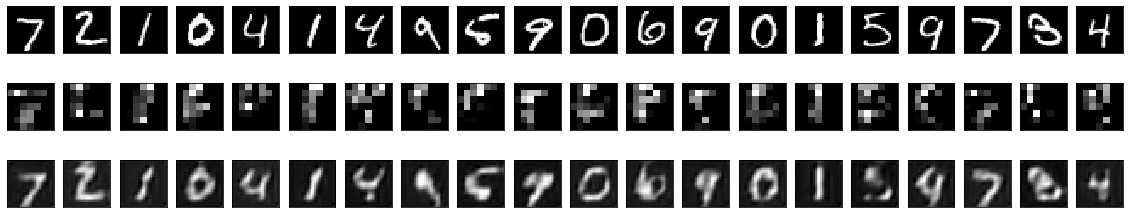

In [58]:
n = 20  
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(7, 7))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()